In [1]:
import torch
import torch.optim

import CARS as C

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
model = C.CARSAutoEncoderV3(512).to(device)
train_load, test_load = C.get_cars_loaders(download=False)
opt_enc = torch.optim.Adam(model.classifier.parameters(), lr=0.01)
opt_dec = torch.optim.Adam(model.decoder.parameters(), lr=0.001)

In [3]:
epoch_enc = 0
for _ in range(120:
    epoch_enc += 1
    C.train_encoder(model, device, train_load, opt_enc, epoch_enc)
    C.test_encoder(model, device, test_load)

Train Epoch: 1 [0/12804 (0%)]	Loss: 2.345853
Train Epoch: 1 [4000/12804 (31%)]	Loss: 0.000000
Train Epoch: 1 [8000/12804 (62%)]	Loss: 0.000000
Train Epoch: 1 [12000/12804 (94%)]	Loss: 0.000000

Test set: Average loss: 80.0898, Accuracy: 474/1571 (30%)



Train Epoch: 1 [0/12804 (0%)]	Loss: 0.695543
Train Epoch: 1 [4000/12804 (31%)]	Loss: 0.445708
Train Epoch: 1 [8000/12804 (62%)]	Loss: 0.476010
Train Epoch: 1 [12000/12804 (94%)]	Loss: 0.453820


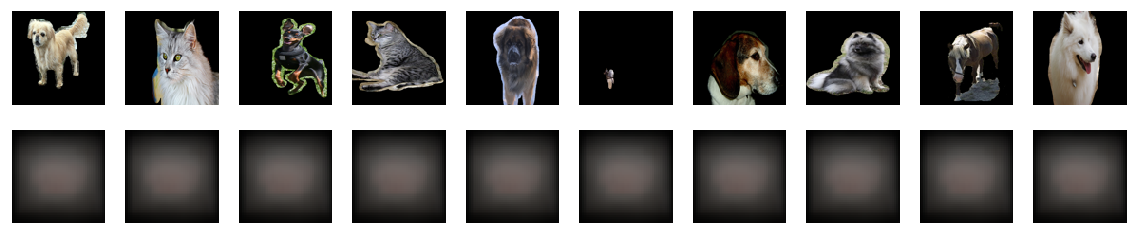

In [4]:
epoch_dec = 0
for _ in range(50):
    epoch_dec += 1
    C.train_decoder(model, device, train_load, opt_dec, epoch_dec)
    C.test_decoder(model, device, test_load)

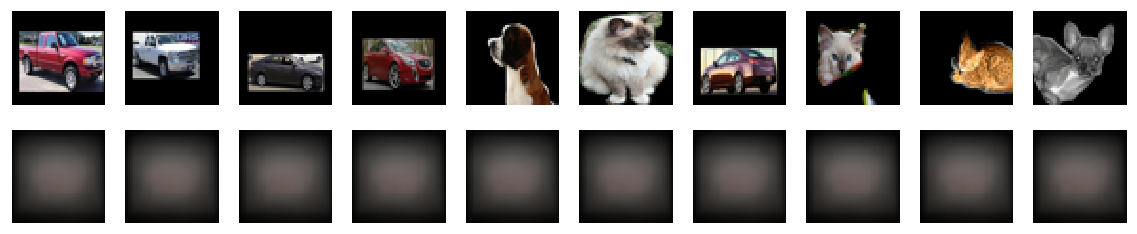

In [5]:
C.show_true_and_recreated_imgs(model, train_load, device)

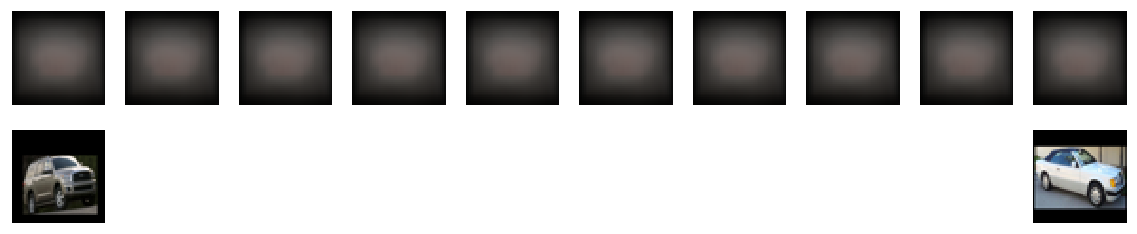

In [6]:
C.show_transition(model, train_load, device)